# Data Import

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [120]:
df = pd.read_csv("/content/drive/MyDrive/dataset/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


# EDA and Preproccesing

In [121]:
df = df.drop(["Date"],axis=1)

In [122]:
for i in range(len(df.values)):
  df.iloc[i,5] = int(df.iloc[i,5].replace(",",""))

In [123]:
avg = 0
num = 0
for i in range(len(df.values)):
  if df.iloc[i,4] != '-':
    df.iloc[i,4] = int(df.iloc[i,4].replace(",",""))
    avg += df.iloc[i,4]
    num += 1
  else:
    df.iloc[i,4] = int(avg/num)

In [124]:
df

,Open,High,Low,Close,Volume,Market Cap
0,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
...,...,...,...,...,...,...
1551,116.38,125.60,92.28,105.21,148164250,1292190000
1552,139.00,139.89,107.72,116.99,148164250,1542820000
1553,144.00,146.93,134.05,139.00,148164250,1597780000
1554,134.44,147.49,134.00,144.54,148164250,1491160000


In [125]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.998561,0.998157,0.997514
High,0.998561,1.000000,0.997320,0.998596
Low,0.998157,0.997320,1.000000,0.998755
Close,0.997514,0.998596,0.998755,1.000000


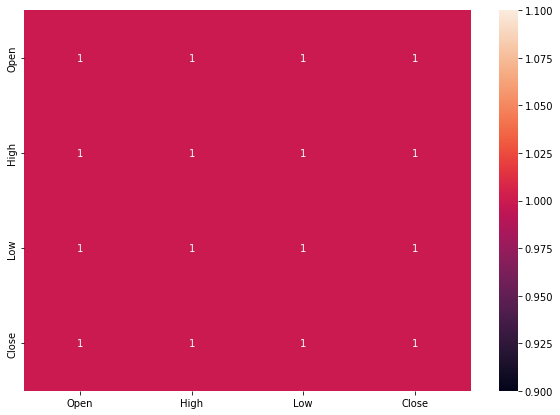

In [126]:
import seaborn as sns
plt.figure(figsize=[10,7])
sns.heatmap(df.corr().round(2),annot=True)

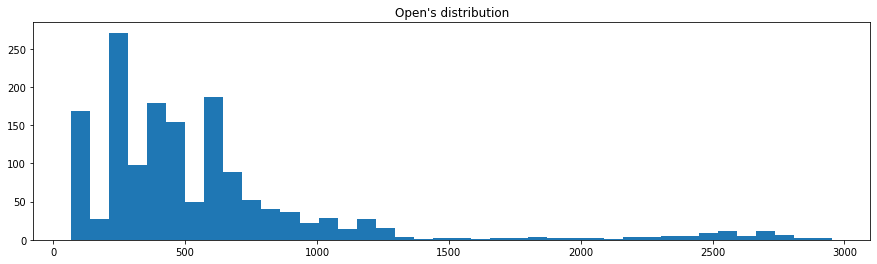

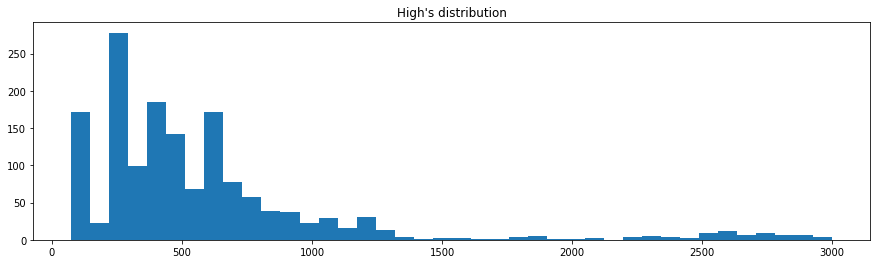

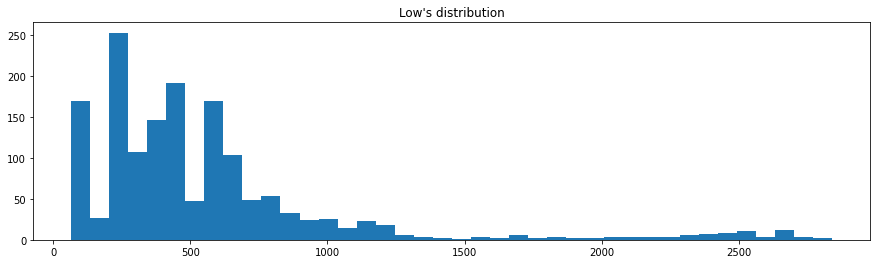

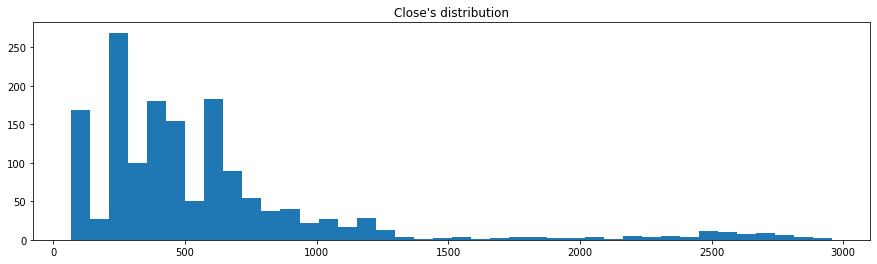

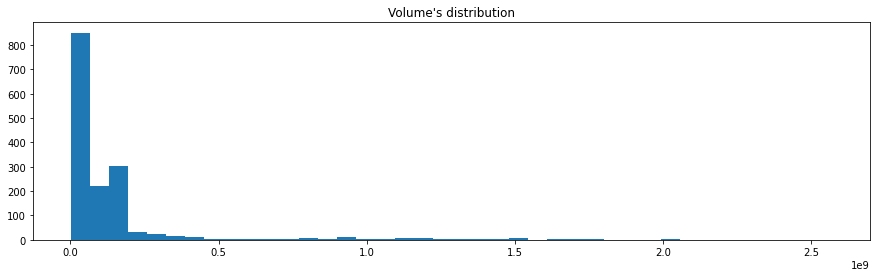

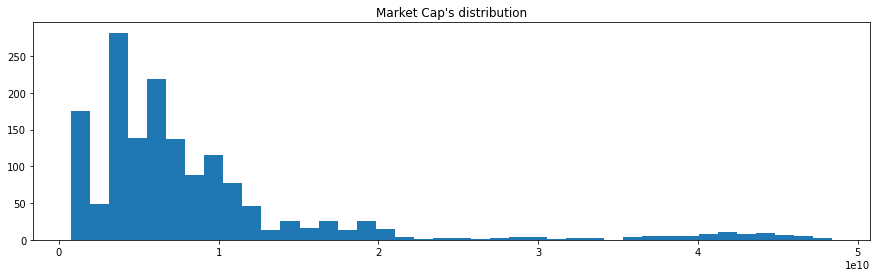

In [127]:
features = np.array(df.columns)
for f in features :
    plt.figure(figsize=(15,4))
    plt.hist( df[f],bins = 40) ; 
    plt.title("{}\'s distribution".format(f))

# Splitting the Data

In [128]:
from sklearn.model_selection import train_test_split as tts
y = df[["Close"]]
X = df.drop(["Close"],axis=1)
X_train,X_test,y_train,y_test = tts(X.values,y.values.ravel(),test_size=0.2)

# Choosing various models

In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
print("The R2_score of Linear Regression is",r2_score(y_test,pred_lr))
print("The Mean Squared Error of Linear Regression is",mse(y_test,pred_lr))
print("The Mean absolute Error of Linear Regression is",mae(y_test,pred_lr))

The R2_score of Linear Regression is 0.9994022989681755
The Mean Squared Error of Linear Regression is 160.14620847351168
The Mean absolute Error of Linear Regression is 6.439625713055873


In [130]:
from lightgbm import LGBMRegressor
lgr = LGBMRegressor()
lgr.fit(X_train,y_train)
pred_lgr = lgr.predict(X_test)
print("The R2_score of LGBMRegressor is",r2_score(y_test,pred_lgr))
print("The Mean Squared Error of LGBMRegressor is",mse(y_test,pred_lgr))
print("The Mean absolute Error of LGBMRegressor is",mae(y_test,pred_lgr))

The R2_score of LGBMRegressor is 0.9972175129550221
The Mean Squared Error of LGBMRegressor is 745.5311713611104
The Mean absolute Error of LGBMRegressor is 11.473095205477575


In [131]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train,y_train)
pred_sv = sv.predict(X_test)
print("The R2_score of SVR is",r2_score(y_test,pred_sv))
print("The Mean Squared Error of SVR is",mse(y_test,pred_sv))
print("The Mean absolute Error of SVR is",mae(y_test,pred_sv))

The R2_score of SVR is 0.25329763995745125
The Mean Squared Error of SVR is 200069.1741388019
The Mean absolute Error of SVR is 206.2860294405424


In [132]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
pred_knr = knr.predict(X_test)
print("The R2_score of K-Neighbors Regressor is",r2_score(y_test,pred_knr))
print("The Mean Squared Error of K-Neighbors Regressor is",mse(y_test,pred_knr))
print("The Mean absolute Error of K-Neighbors Regressor is",mae(y_test,pred_knr))

The R2_score of K-Neighbors Regressor is 0.9882402145702277
The Mean Squared Error of K-Neighbors Regressor is 3150.8813750769236
The Mean absolute Error of K-Neighbors Regressor is 30.247769230769237


# Hyper Parameter Tuning

### For LGBM Regressor

In [133]:
btype = ["gbdt","dart","goss"]
nest = [100,300,700,900,1000]
btb = ""
nb = 0
rb = 0
for i in btype:
  for j in nest:
    lgr = LGBMRegressor(boosting_type=i,n_estimators=j)
    lgr.fit(X_train,y_train)
    pred_lgr = lgr.predict(X_test)
    if r2_score(y_test,pred_lgr) > rb:
      rb = r2_score(y_test,pred_lgr)
      btb = i
      nb = j
print("The best boosting type is",btb)
print("The optimal n_estimators values",nb)
print("The best R2 score is",rb)

The best boosting type is gbdt
The optimal n_estimators values 100
The best R2 score is 0.9972175129550221


### For SVR

In [134]:
c = [1,10,100,1000,10000]
cb = 0
rb = 0
for i in c:
  sv = SVR(C=i)
  sv.fit(X_train,y_train)
  pred_sv = sv.predict(X_test)
  if r2_score(y_test,pred_sv) > rb:
    rb = r2_score(y_test,pred_sv)
    cb = i
print("The best C value is",cb)
print("The best R2 score is",rb)

The best C value is 10000
The best R2 score is 0.9875588581164443


### For K-Neighbors Regressor

In [135]:
kn = [2,6,8,12,14,18]
wei = ['uniform','distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
kb = 0
wb = ""
ab = ""
rb = 0
for i in kn:
  for j in wei:
    for k in algo:
      knr = KNeighborsRegressor(n_neighbors=i,weights=j,algorithm=k)
      knr.fit(X_train,y_train)
      pred_knr = knr.predict(X_test)
      if r2_score(y_test,pred_knr) > rb:
        rb = r2_score(y_test,pred_knr)
        kb = i
        wb = j
        ab = k
print("The best n_neighbors value is",kb)
print("The best weight value is",wb)
print("The best algorithm value is",ab)
print("The best R2 score is",rb)

The best n_neighbors value is 14
The best weight value is distance
The best algorithm value is auto
The best R2 score is 0.9892942725974725


# Training the models with the best parameters

In [136]:
models = ["Linear Regression","LGBM Regressor","SV Regressor","K-Neighbors Regressor"]
r2sc = []
msec = []
maec = []

lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
r2sc.append(r2_score(y_test,pred_lr))
msec.append(mse(y_test,pred_lr))
maec.append(mae(y_test,pred_lr))

lgr = LGBMRegressor(boosting_type=btb,n_estimators=nb)
lgr.fit(X_train,y_train)
pred_lgr = lgr.predict(X_test)
r2sc.append(r2_score(y_test,pred_lgr))
msec.append(mse(y_test,pred_lgr))
maec.append(mae(y_test,pred_lgr))

sv = SVR(C=cb)
sv.fit(X_train,y_train)
pred_sv = sv.predict(X_test)
r2sc.append(r2_score(y_test,pred_sv))
msec.append(mse(y_test,pred_sv))
maec.append(mae(y_test,pred_sv))

knr = KNeighborsRegressor(n_neighbors=kb,weights=wb,algorithm=ab)
knr.fit(X_train,y_train)
pred_knr = knr.predict(X_test)
r2sc.append(r2_score(y_test,pred_knr))
msec.append(mse(y_test,pred_knr))
maec.append(mae(y_test,pred_knr))

In [137]:
from tabulate import tabulate
header = ["Models","R2 score","MSE  ","MAE  "]
print(tabulate(list(zip(models,r2sc,msec,maec)), header, tablefmt="grid"))

+-----------------------+------------+----------+----------+
| Models                |   R2 score |    MSE   |    MAE   |
+=======================+============+==========+==========+
| Linear Regression     |   0.999402 |  160.146 |  6.43963 |
+-----------------------+------------+----------+----------+
| LGBM Regressor        |   0.997218 |  745.531 | 11.4731  |
+-----------------------+------------+----------+----------+
| SV Regressor          |   0.987559 | 3333.44  | 34.7399  |
+-----------------------+------------+----------+----------+
| K-Neighbors Regressor |   0.989294 | 2868.46  | 30.2611  |
+-----------------------+------------+----------+----------+


# Overall Best Model

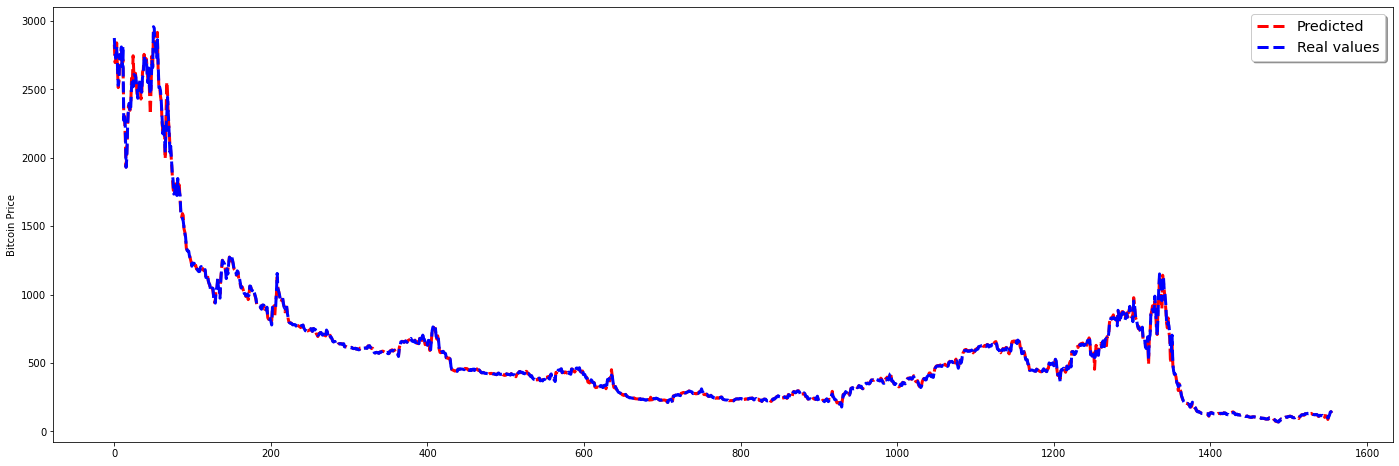

In [177]:
lr = LinearRegression()
lr.fit(X.values,y.values.ravel())
pred_lr = lr.predict(X.values)

plt.figure(figsize=[24,8])
plt.plot(pred_lr,color='red',linestyle='dashed',linewidth=3,label="Predicted")
plt.plot(y.values.ravel(),color='blue',linewidth=3,linestyle='dashed',label="Real values")
plt.ylabel("Bitcoin Price")
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()